# Plotting

In [1]:
# Imports
from music21.pitch import Pitch
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from solmization import solmize, get_gamut, Solmization
from solmization.parse_graph import ParseGraph
from solmization.gamut_graph import HexachordGraph

## Hexachord graph

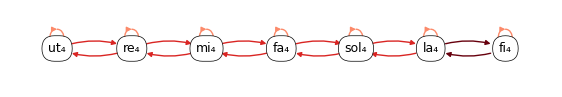

In [2]:
H = HexachordGraph('G3')
H.draw()

## Gamut graph

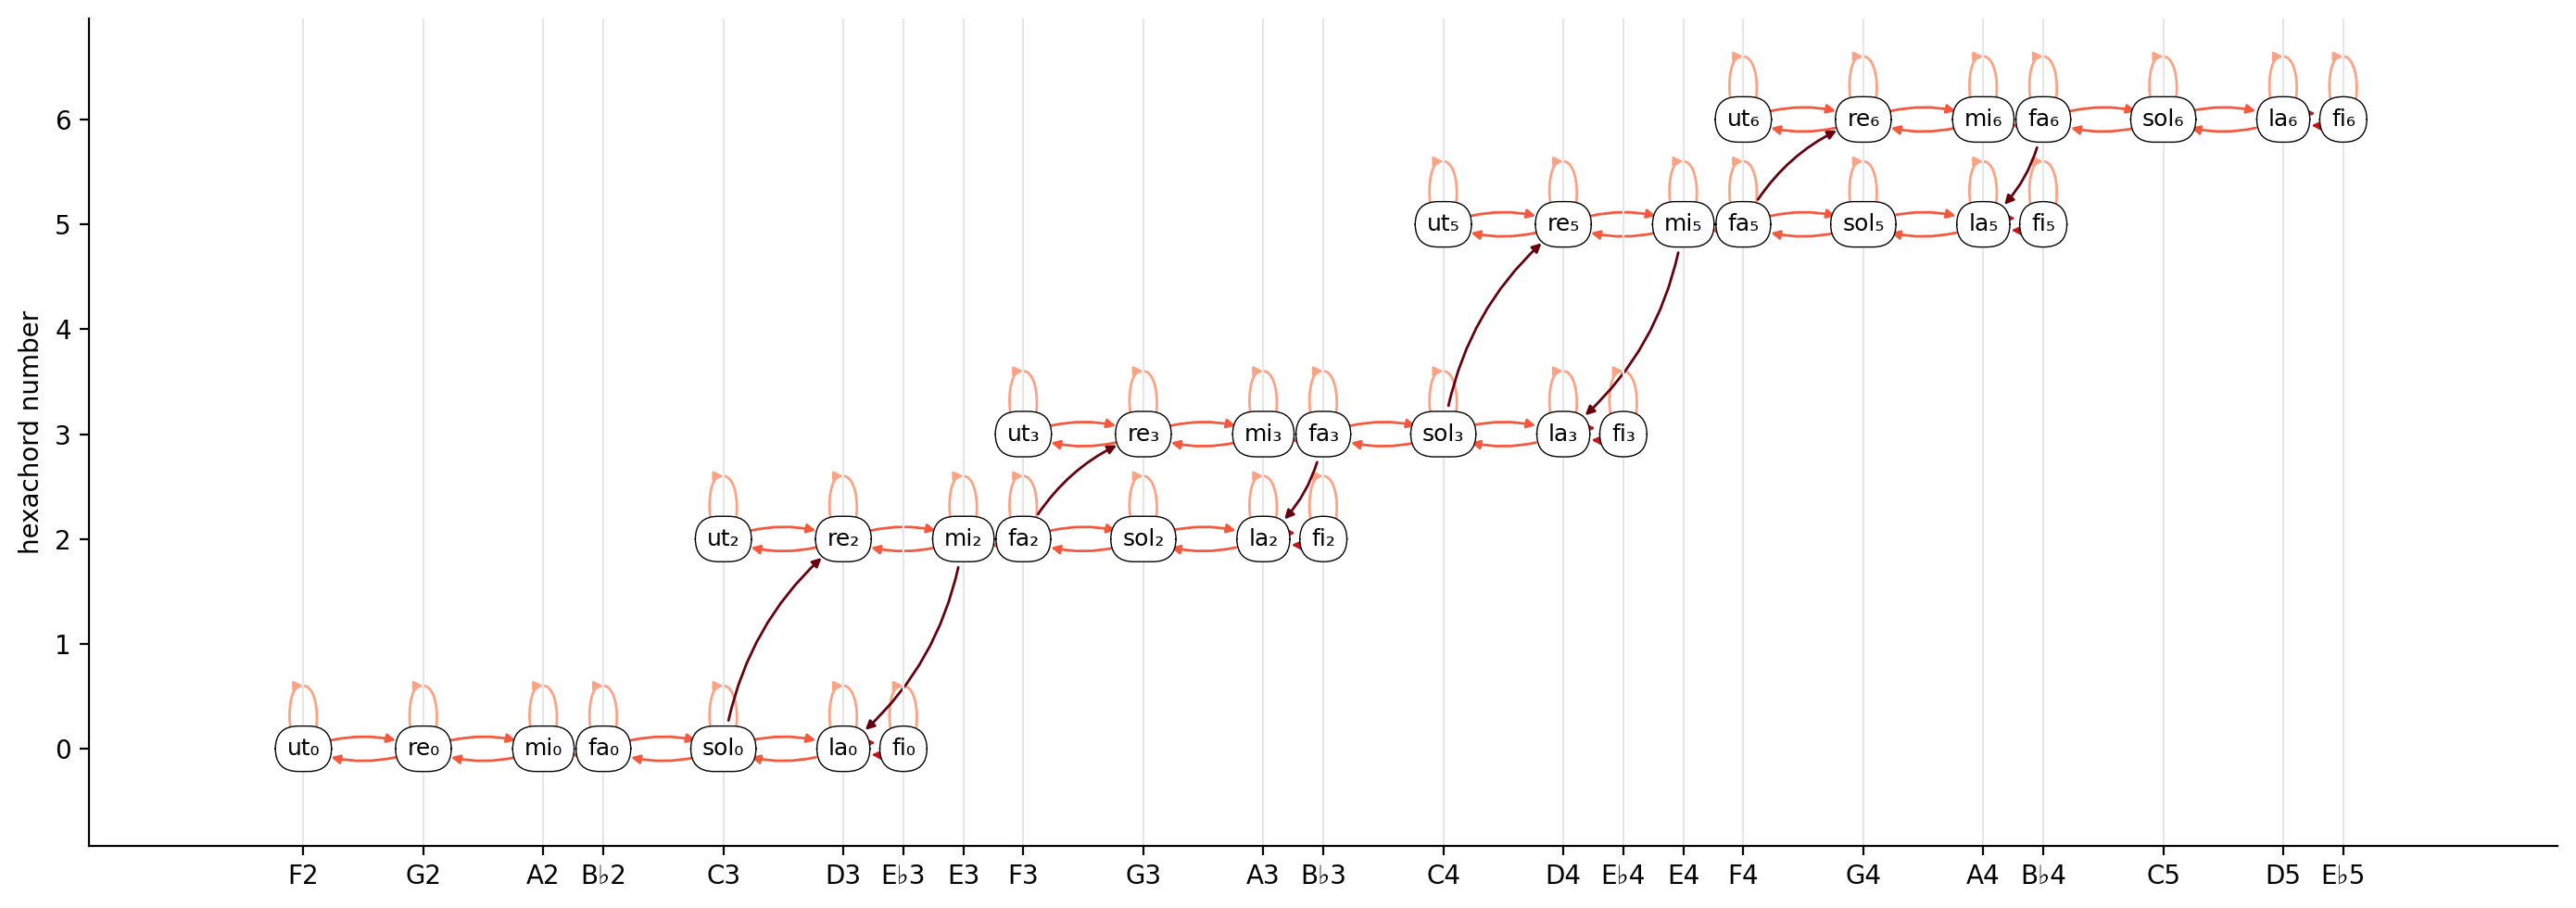

In [3]:
get_gamut('soft-continental').draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-gamut-graph.png')


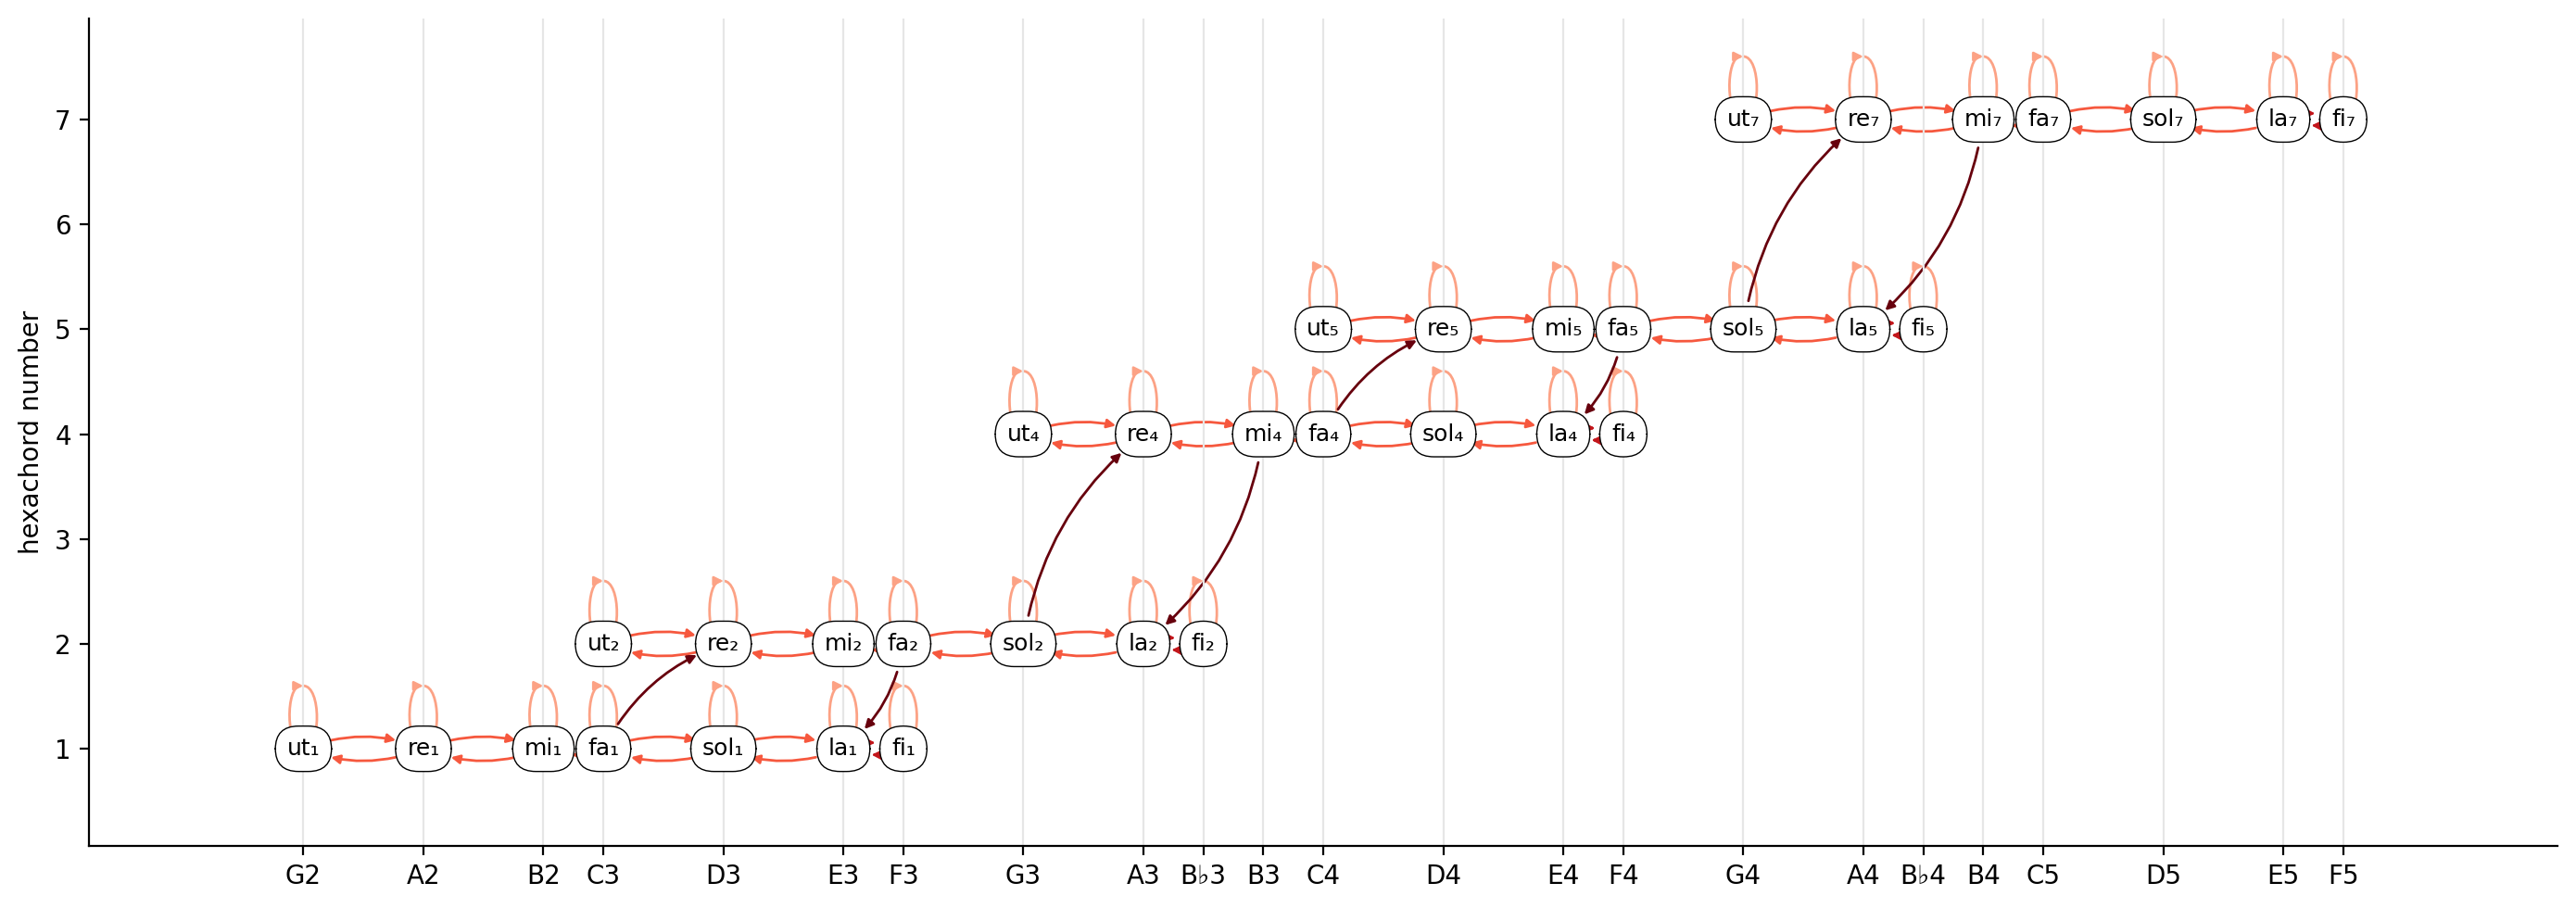

In [4]:
get_gamut('hard-continental').draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-gamut-graph.png')


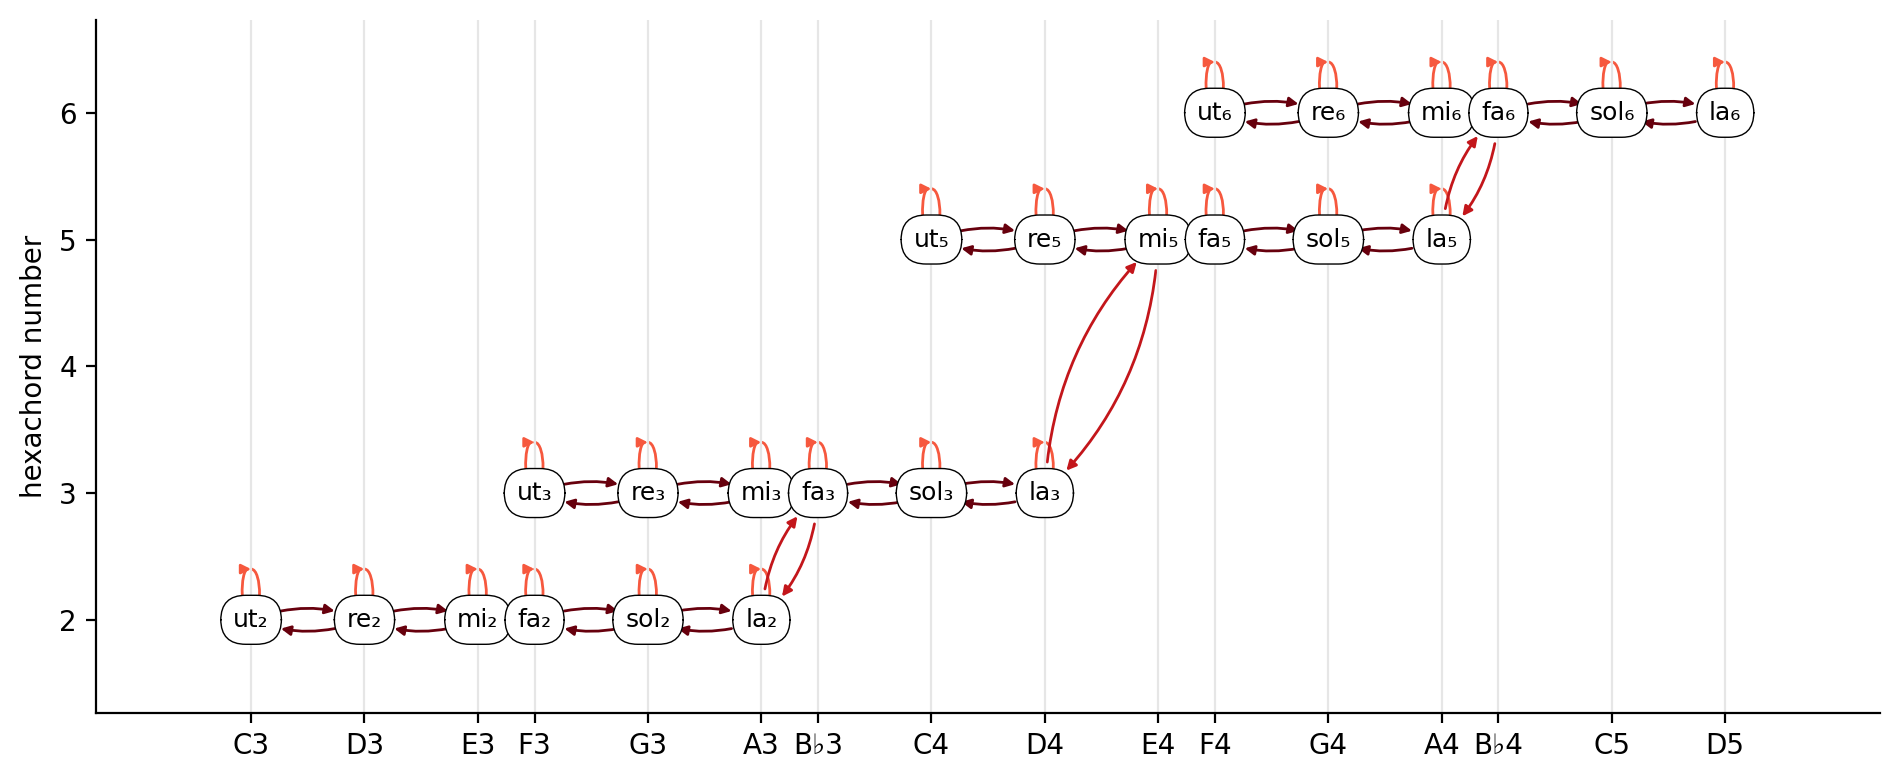

In [6]:
gamut = get_gamut('soft-english')
gamut.draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-english-gamut.png')

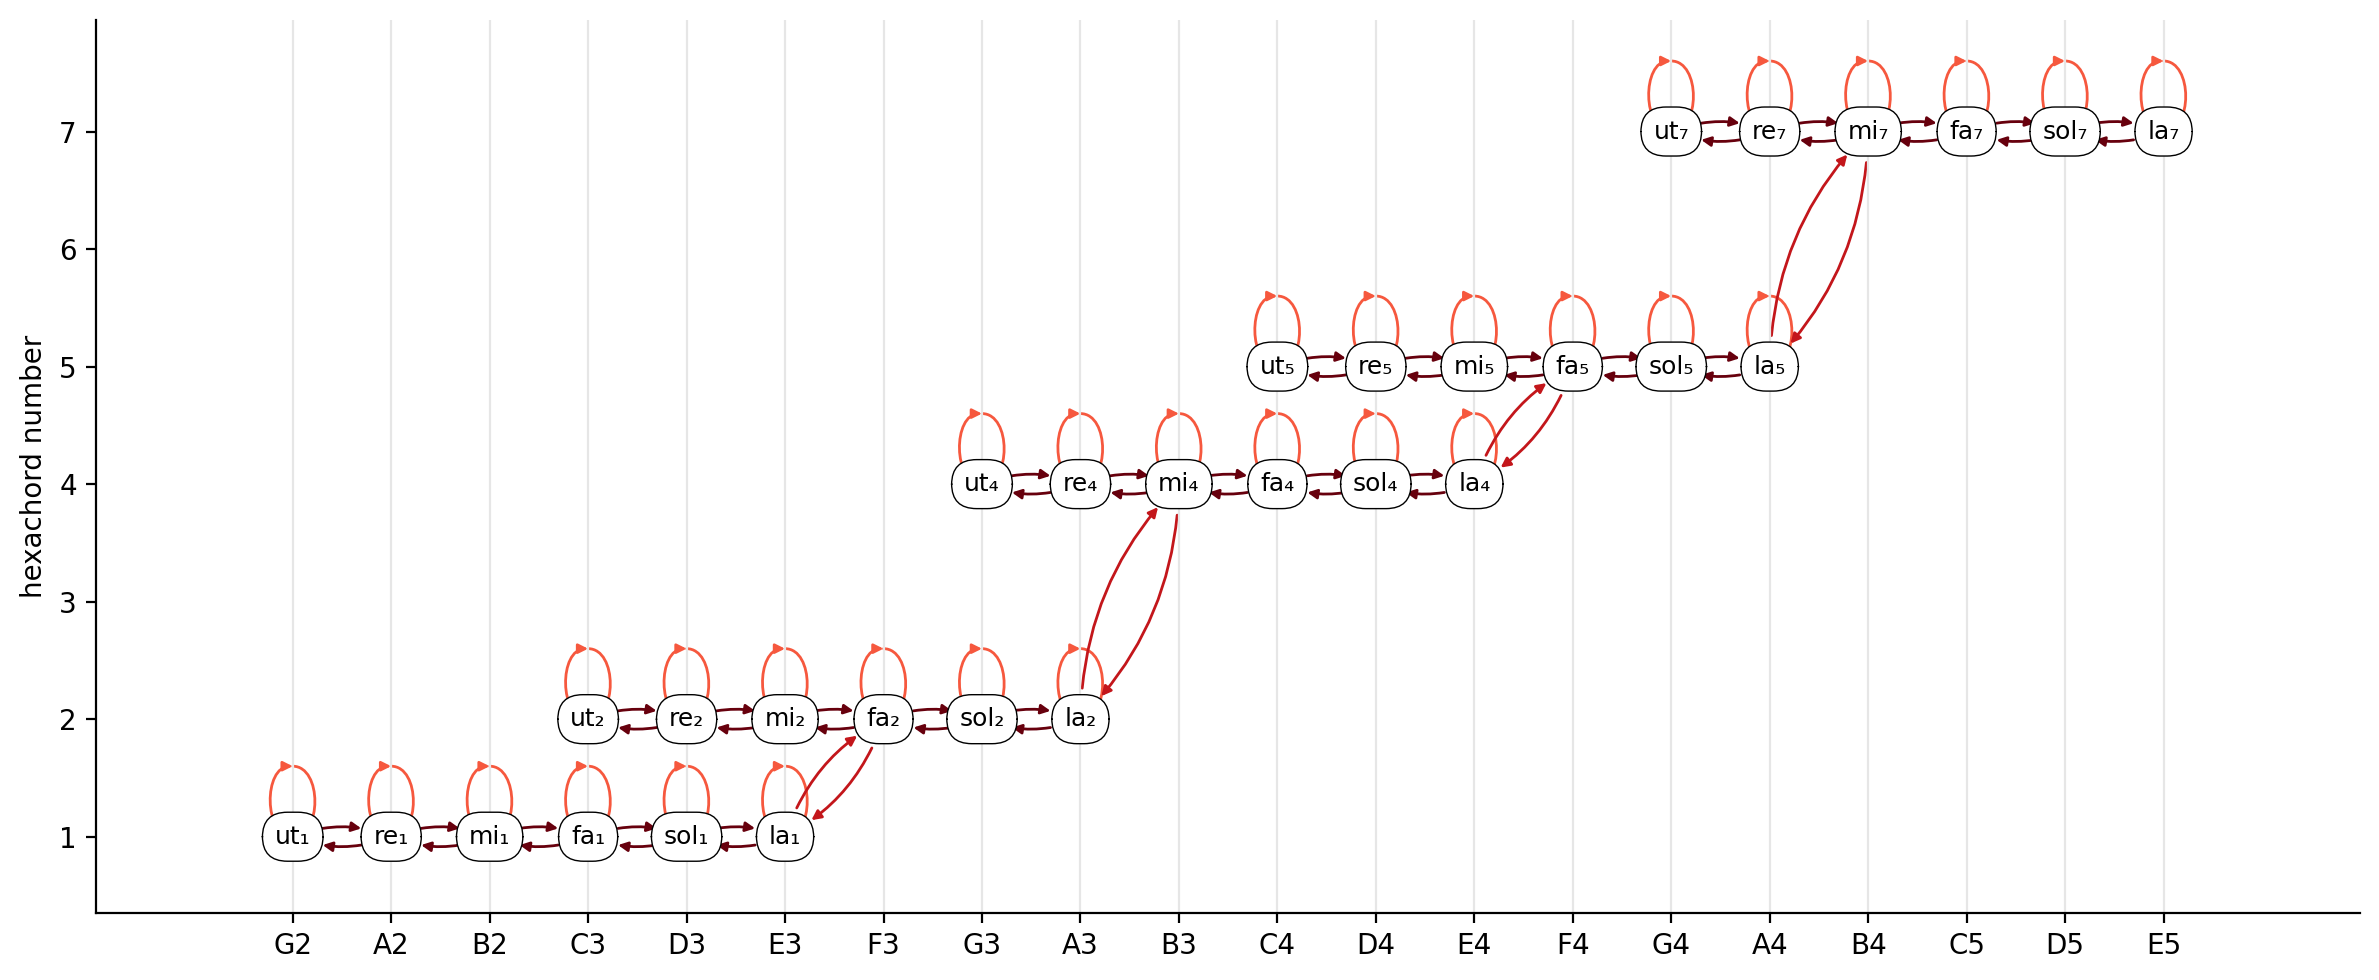

In [9]:
gamut = get_gamut('hard-english')
gamut.draw(show_loops=True)
plt.tight_layout()
# plt.savefig('../figures/soft-english-gamut.png')

## Parse graph

Let's parse a hexachord graph, not a graph we really need to parse in the end, but still.

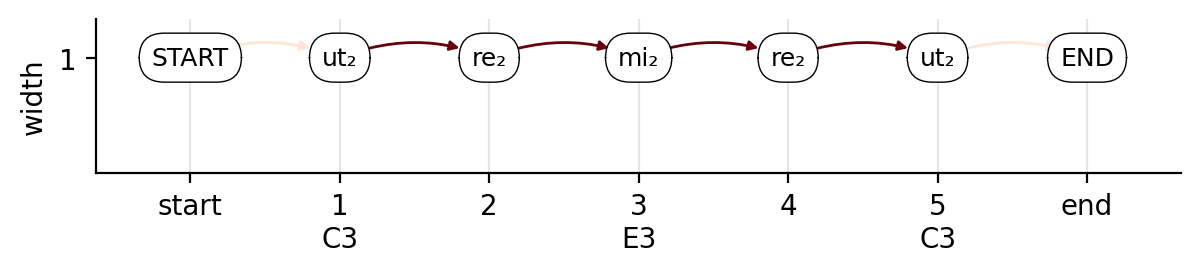

In [9]:
H = HexachordGraph("C3")
seq = [Pitch(p) for p in "C3 E3 C3".split(" ")]
match_fn = lambda node, target: node == target
parse = ParseGraph(H, seq, match_fn=match_fn)
parse.draw()

Here we see the effect of pruning the parse graph. Here is the parse graph without pruning:

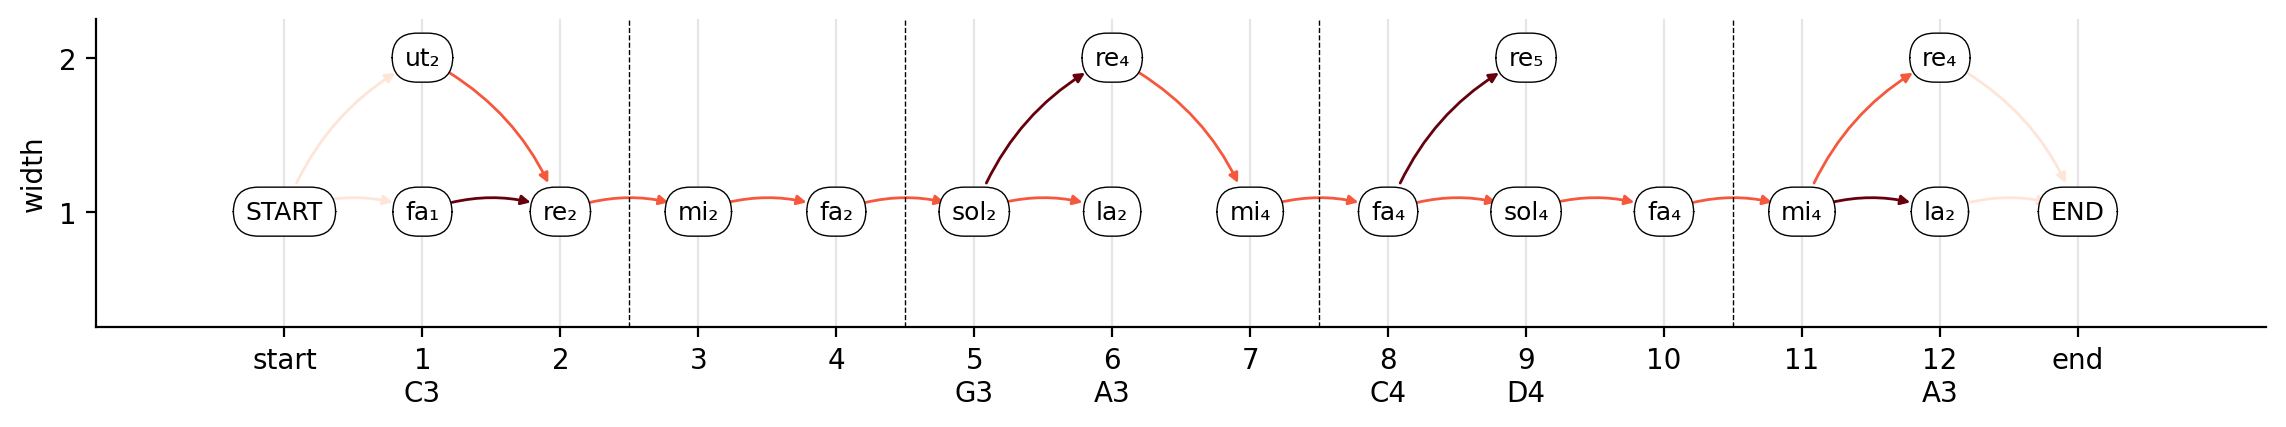

In [12]:
Solmization('C3 G3 A3 C4 D4 A3'.split(' '), gamut='hard-continental', prune_parse=False).draw_parse()

And here the same parse graph, but now with pruning

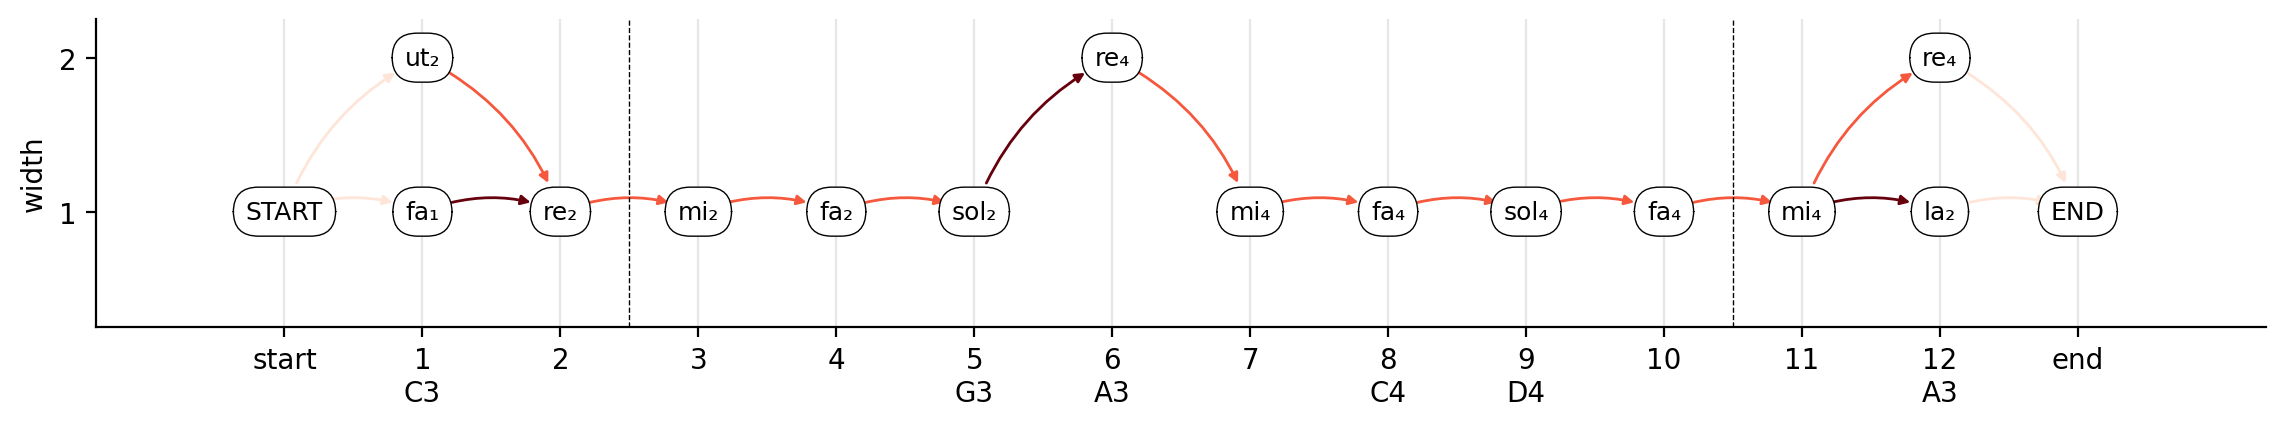

In [13]:
sol = Solmization('C3 G3 A3 C4 D4 A3'.split(' '), gamut='hard-continental').draw_parse()

(-1.0, 4.0)

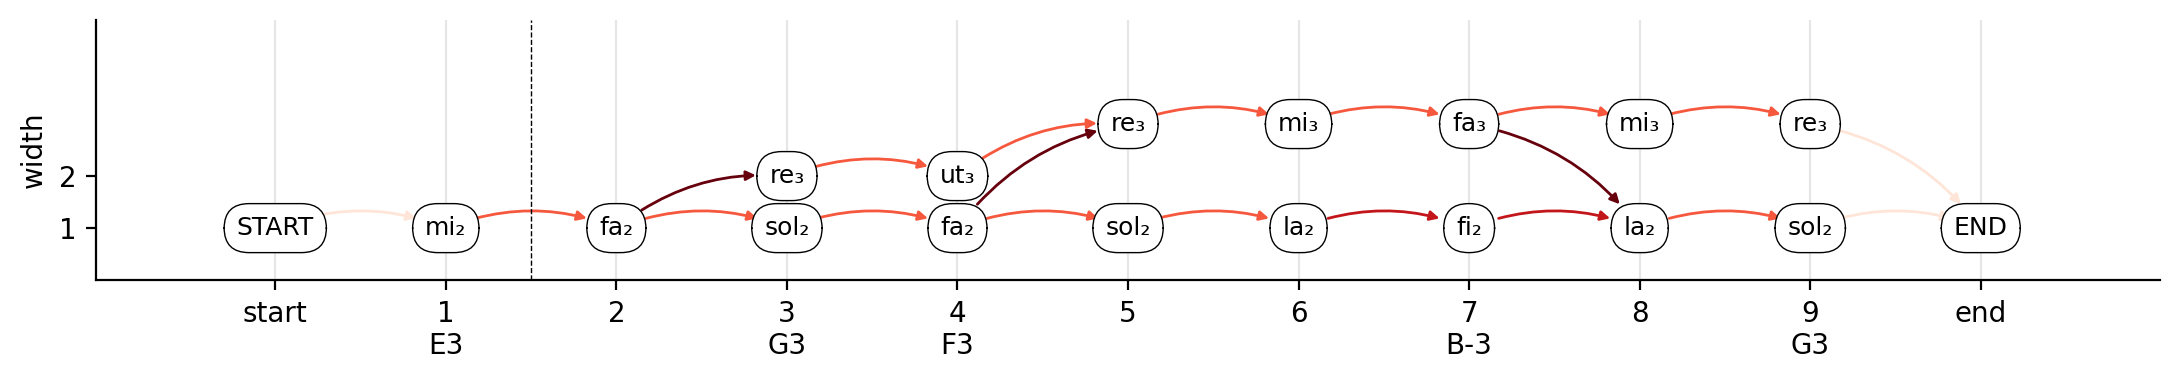

In [16]:
sol = Solmization('E3 G3 F3 B-3 G3'.split(' '), gamut='soft-continental', prune_parse=False).draw_parse()
plt.tight_layout()
plt.ylim(-1, 4)
# plt.savefig('../figures/parse-graph.png')


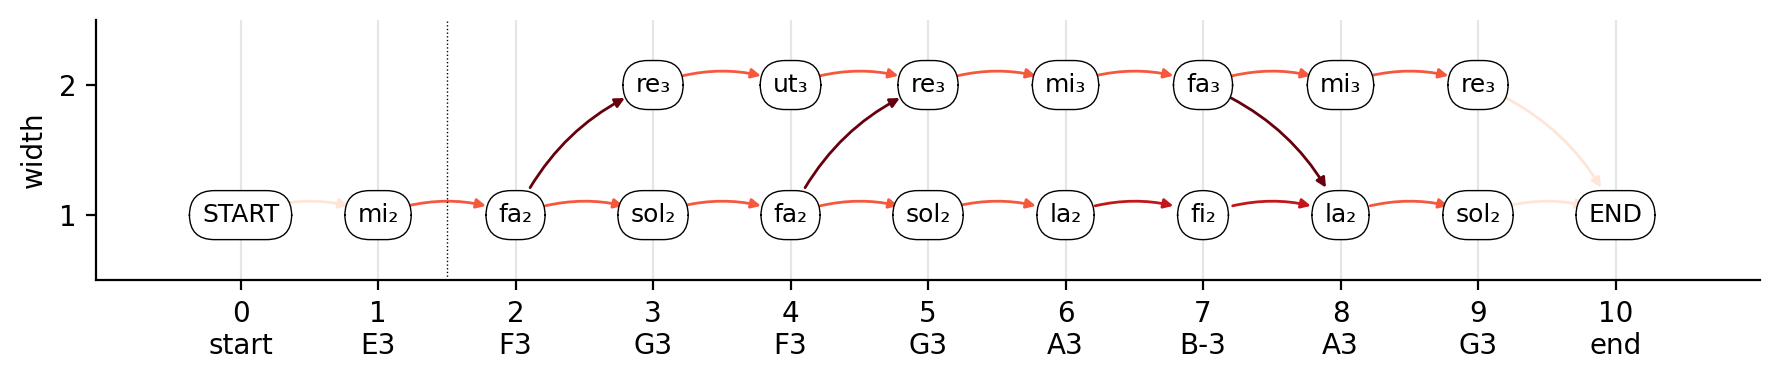

In [9]:
sol = Solmization('E3 G3 F3 B-3 G3'.split(' '), gamut='soft-continental').draw()
plt.tight_layout()
plt.savefig('../figures/parse-graph.png')
